In [2]:
import numpy as np

#  KNN

In [6]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [7]:
group,labels = createDataSet()
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [8]:
labels

['A', 'A', 'B', 'B']

In [9]:
x1 = group[:,0]
x1

array([1., 1., 0., 0.])

In [10]:
x2 = group[:,1]
x2

array([1.1, 1. , 0. , 0.1])

In [11]:
import matplotlib.pyplot as plt

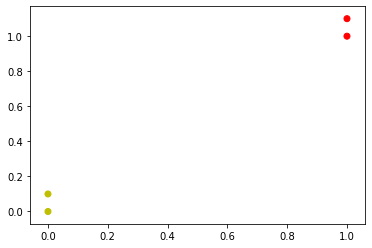

In [32]:
x3 = plt.scatter(x1,x2,c=['r','r','y','y'])

In [54]:
import operator
def indexData(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # 计算训练集中每个样本到测试点的距离
    Repeat = np.tile(inX, (dataSetSize,1)) - dataSet
    #计算差方
    sqDiffMat = Repeat**2
    #差方和方差-横向
    sqDistances = sqDiffMat.sum(axis=1)
    #计算标准差（方差开方）
    distances = sqDistances**0.5
    # 计算完所有点的距离后，对数据按照从小到大的次序排序
    sortedDistIndicies = distances.argsort()
    # 返回发生频率最高的元素类别
    classCount={}
    #创建一个字典
    for i in range(k):
        #通过排序下表查看对应的标签值
        voteIlabel = labels[sortedDistIndicies[i]]
        #在字典中添加对应数量信息
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #字典按键排序
    print(sortedClassCount)
    return sortedClassCount[0][0]

In [55]:
indexData([0.2,0.2],group,labels,3)

[('B', 2), ('A', 1)]


'B'

#  归一思想

In [60]:
def file2matrix(filename):
    with open(filename) as f:
        arrayOLines = f.readlines()
        numberOFLines = len(arrayOLines)
        returnMat = np.zeros((numberOFLines,3))
        classLabelVector = []
        index = 0
        for line in arrayOLines:
            line = line.strip()
            listFromLine = line.split('\t')
            returnMat[index,:] = listFromLine[0:3]
            classLabelVector.append(int(listFromLine[-1]))
            index += 1
    return returnMat,classLabelVector

In [72]:
a = file2matrix('datingTrainSet.txt')
datingDataMat = a[0]
datingLabels = a[1]

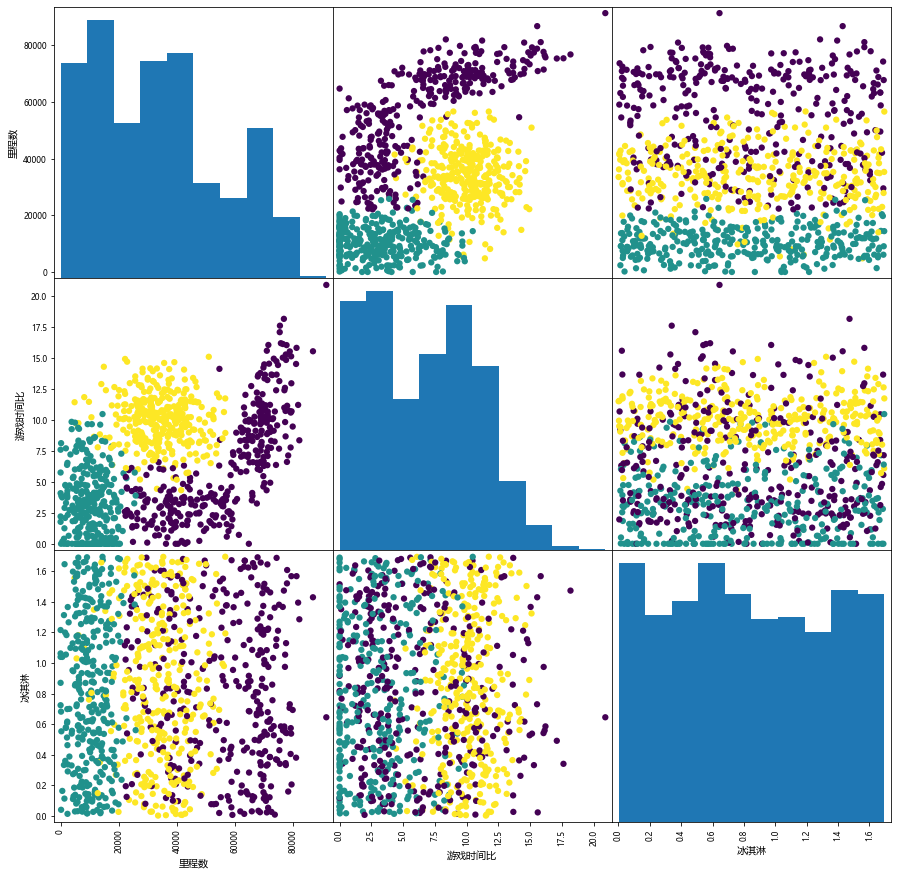

In [76]:
import pandas as pd
pdobj = pd.DataFrame(datingDataMat,columns=['里程数','游戏时间比','冰淇淋'])
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
grr = pd.plotting.scatter_matrix(pdobj,c=datingLabels,figsize=(15,15),marker='o',s=40,alpha=8)

In [77]:
def autoNorm(dataSet):
    minVals = dataSet.min(axis=0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = dataSet - minVals
    normDataSet = normDataSet/ranges
    return normDataSet,ranges,minVals

In [93]:
def datingClassTest():
    hoRatio = 0.10
    #获取转化后的数据
    datingDataMat,datingLabels = file2matrix('datingTrainSet.txt')
    #进行归一化处理
    normMat,ranges,minVals = autoNorm(datingDataMat)
    #获取样本
    m = normMat.shape[0]
    #计算测试样本的数量
    numTestVecs = int(m*hoRatio)
    #计算预测错误的数量
    errorCount = 0.0
    for i in range(numTestVecs):
        #预测每个样本数据所属分类
        classifierResult = indexData(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('预测结果为:%d,真实结果为:%d'%(classifierResult,datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print('错误率为:%f'%(errorCount/numTestVecs*100)+"%")

In [94]:
datingClassTest()

[(3, 3)]
预测结果为:3,真实结果为:3
[(2, 2), (3, 1)]
预测结果为:2,真实结果为:2
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(3, 2), (1, 1)]
预测结果为:3,真实结果为:3
[(3, 3)]
预测结果为:3,真实结果为:3
[(1, 3)]
预测结果为:1,真实结果为:1
[(3, 3)]
预测结果为:3,真实结果为:3
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(2, 3)]
预测结果为:2,真实结果为:2
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(2, 3)]
预测结果为:2,真实结果为:2
[(3, 3)]
预测结果为:3,真实结果为:3
[(2, 3)]
预测结果为:2,真实结果为:2
[(1, 3)]
预测结果为:1,真实结果为:1
[(3, 1), (2, 1), (1, 1)]
预测结果为:3,真实结果为:2
[(3, 2), (1, 1)]
预测结果为:3,真实结果为:3
[(2, 3)]
预测结果为:2,真实结果为:2
[(3, 3)]
预测结果为:3,真实结果为:3
[(2, 3)]
预测结果为:2,真实结果为:2
[(3, 3)]
预测结果为:3,真实结果为:3
[(2, 3)]
预测结果为:2,真实结果为:2
[(1, 3)]
预测结果为:1,真实结果为:1
[(3, 3)]
预测结果为:3,真实结果为:3
[(1, 3)]
预测结果为:1,真实结果为:1
[(3, 2), (2, 1)]
预测结果为:3,真实结果为:3
[(1, 3)]
预测结果为:1,真实结果为:1
[(2, 2), (3, 1)]
预测结果为:2,真实结果为:2
[(1, 3)]
预测结果为:1,真实结果为:1
[(1, 3)]
预测结果为:1,真实结果为:1
[(2, 3)]
预测结果为:2,真实

In [97]:
def classifyPerson():
    ffMiles = float(input("请输入对方年里程数："))
    percentTats = float(input("请输入对方玩儿游戏时间占比："))
    iceCeam = float(input("请输入对方每周消费的冰淇淋公升数："))
    #获取转化后的数据
    datingDataMat,datingLabels = file2matrix('datingTrainSet.txt')
    #进行归一化处理
    normMat,ranges,minVals = autoNorm(datingDataMat)
    #将获取到的数据转换成np数组
    inArr = np.array([ffMiles,percentTats,iceCeam])
    #测试数据归一化
    inArr = (inArr - minVals)/ranges
    classifierResult = indexData(inArr,normMat,datingLabels,3)
    resultList = ["不感兴趣","感觉一般","非常吸引"]
    print("您对对方的感觉为:%s"%(resultList[classifierResult-1]))

In [99]:
classifyPerson()

请输入对方年里程数：1231232
请输入对方玩儿游戏时间占比：123
请输入对方每周消费的冰淇淋公升数：1.2
[(1, 3)]
您对对方的感觉为:不感兴趣


In [1]:
import numpy as np

In [2]:
data = np.loadtxt('datingTrainSet.txt')
data

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01, 3.0000000e+00],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00, 2.0000000e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01, 1.0000000e+00],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01, 3.0000000e+00],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01, 3.0000000e+00],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00, 3.0000000e+00]])

In [3]:
X = data[:,:-1]
Y = data[:,-1:]

In [4]:
X,Y

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]), array([[3.],
        [2.],
        [1.],
        [1.],
        [1.],
        [1.],
        [3.],
        [3.],
        [1.],
        [3.],
        [1.],
        [1.],
        [2.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [3.],
        [2.],
        [1.],
        [2.],
        [3.],
        [2.],
        [3.],
        [2.],
        [3.],
        [2.],
        [1.],
        [3.],
        [1.],
        [3.],
        [1.],
        [2.],
        [1.],
        [1.],
        [2.],
        [3.],
        [3.],
        [1.],
        [2.],
        [3.],
        [3.],
        [3.],
        [1.],
        [1.]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.1)#test_size指定切分比例
X_train.shape

(900, 3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
model = clf.fit(X_train,Y_train)

C:\Users\86427\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [8]:
res = model.predict(X_test)
res

array([2., 3., 3., 1., 3., 1., 1., 2., 2., 2., 2., 3., 3., 2., 3., 2., 1.,
       3., 1., 1., 1., 1., 3., 3., 3., 2., 3., 3., 3., 2., 3., 1., 3., 2.,
       1., 3., 1., 3., 2., 3., 3., 1., 1., 3., 1., 1., 3., 3., 1., 2., 1.,
       1., 3., 2., 2., 3., 1., 2., 2., 3., 3., 2., 3., 2., 3., 2., 3., 2.,
       1., 3., 3., 2., 2., 2., 1., 1., 3., 1., 3., 3., 1., 3., 3., 2., 3.,
       3., 2., 2., 1., 2., 3., 1., 2., 1., 2., 3., 1., 1., 3., 2.])

In [9]:
model.score(X_test,Y_test)

0.78

In [10]:
testData = np.array([1000,10,0.5]).reshape(1,-1)
res = model.predict(testData)
res

array([2.])

In [11]:
from sklearn.datasets import load_iris
data = load_iris()

In [12]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
X = data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
Y = data.target
Y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)
X_train.shape

(112, 4)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
model = clf.fit(X_train,Y_train)

In [55]:
res = model.predict(X_test)
res

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [56]:
model.score(X_test,Y_test)

0.9736842105263158

In [59]:
testData = np.array([5.1, 3.5, 1.4, 0.2]).reshape(1,-1)
res = model.predict(testData)
res

array([0])